In [1]:
import matplotlib.pyplot as pl
import matplotlib as mpl
import numpy as np
from matplotlib.patches import Polygon
from sympy.solvers import solve

In [2]:
# Kinematics
Q = 91
qT = 10
y = 1
M = np.sqrt(Q**2+qT**2)

etamin = -2.4
etamax = 2.4
pTmin = 20

In [3]:
# Define generalised theta function
def GenTheta(eta, x):
    pTo = Q**2 / 2 / ( M * np.cosh(eta - y) - qT * x)
    etao = np.log( ( M * np.exp(y) - pTo * np.exp(eta) ) / ( M * np.exp(-y) - pTo * np.exp(-eta) ) ) / 2
    hs1 = np.heaviside(pTo - pTmin, 1.)
    hs2 = np.heaviside(eta - etamin, 1.) * np.heaviside(etamax - eta, 1.)
    hs3 = np.heaviside( np.sqrt(qT**2 + pTo**2 - 2 * qT * pTo * x) - pTmin, 1. )
    hs4 = np.heaviside(etao - etamin, 1.) * np.heaviside(etamax - etao, 1.)
    return hs1 * hs2 * hs3 * hs4

In [4]:
# Solution obtained with SymPy (Solutions.ipynb)
def f2(eta, pTlim):
    return ( 2 * M * pTlim * np.cosh(eta - y) - Q**2 ) / ( 2 * pTlim * qT )

In [5]:
# Solution obtained with SymPy (Solutions.ipynb)
def f3(eta, etalim):
    return M * np.cosh(eta - y) / qT - Q**2 * np.sinh(eta - etalim) / ( 2 * qT * M * np.sinh(y - etalim) )

In [6]:
# Solution obtained with SymPy (Solutions.ipynb)
def f4(eta, pTlim):
    return ( M * np.cosh(eta - y) * ( Q**2 - 2 * pTlim**2 + 2 * qT**2 ) 
            - Q**2 * np.sqrt( M**2 * np.sinh(eta - y)**2 + pTlim**2) ) / ( 2 * qT * ( M**2 - pTlim**2 ) )

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


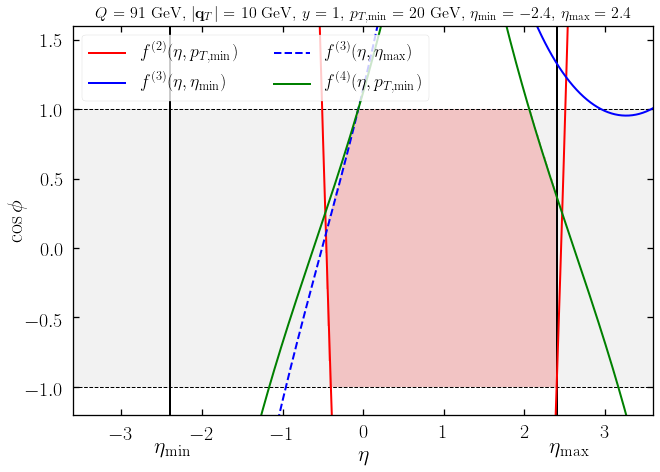

In [7]:
## Define plot parameters
mpl.style.use('seaborn-talk')
mpl.rc('axes', linewidth=2)
mpl.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
mpl.rc("text", usetex = True)
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["xtick.top"] = True
mpl.rcParams["ytick.right"] = True
mpl.rcParams["axes.linewidth"] = 1.3
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1.3
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1.3
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1.3
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1.3

ax = pl.gca()

# Axis labels
pl.xlabel(r'$\eta$', fontsize=22)
pl.ylabel(r'$\cos\phi$', fontsize=22, labelpad=-2)

# Title
pl.title(r"$Q$ = " + str(Q) + " GeV, $|\mathbf{q}_T|$ = " + str(qT) + " GeV, $y$ = " + str(y)
        + r", $p_{T,\rm min}=$ " + str(pTmin) + r" GeV, $\eta_{\rm min}=$ $" + str(etamin)
        + r"$, $\eta_{\rm max}=$ " + str(etamax),
         fontsize = 16)

pl.xticks(size=20)
pl.yticks(size=20)

# Adjust canvas
pl.xlim(-1.2 + etamin, 1.2 + etamax)
pl.ylim(-1.2, 1.6)

# Labels on plot
ax.text(etamin-0.2, -1.5,  r'$\eta_{\rm min}$', fontsize=22)
ax.text(etamax-0.1, -1.5,  r'$\eta_{\rm max}$', fontsize=22)

# Points in eta and x = cos\phi
n = 500
alleta = np.linspace(- 1.2 + etamin, 1.2 + etamax, num = n)
allx   = np.linspace(-1, 1, num = n)
E, X = np.meshgrid(alleta, allx)
T = GenTheta(E, X)

# Countour plot
pl.contourf(E, X, T, levels = [0.0001, 1.], colors = ["red", "blue"], alpha = 0.2)

# Shaded region            
verts = [(-10*etamax, -1)] + [(10*etamax, -1)] + [(10*etamax, 1)] + [(-10*etamax, 1)] 
poly = Polygon(verts, color = "gray", alpha = 0.1)
ax.add_patch(poly)

# Dashed lines
pl.axhline(y=-1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')
pl.axhline(y=1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')

# Theta 1
pl.axvline(x=etamin, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-')
pl.axvline(x=etamax, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-')

# Theta 2
pl.plot(alleta, f2(alleta, pTmin), 'r', linewidth=2, label=r"$f^{(2)}(\eta,p_{T,\rm min})$")

# Theta 3
pl.plot(alleta, f3(alleta, etamin), 'b', linewidth=2, label=r"$f^{(3)}(\eta,\eta_{\rm min})$")
pl.plot(alleta, f3(alleta, etamax), 'b', linewidth=2, label=r"$f^{(3)}(\eta,\eta_{\rm max})$", linestyle='--')

# Theta 4
pl.plot(alleta, f4(alleta, pTmin), 'g', linewidth=2, label=r"$f^{(4)}(\eta, p_{T,\rm min})$")

pl.legend(loc = 'upper left', ncol = 2, fontsize = 18)
pl.savefig("../plots/IntDomain.pdf")

In [8]:
## Redefine Kinematics
Q = 91
qT = 10
y = 3
M = np.sqrt(Q**2+qT**2)

etamin = 2
etamax = 4.5
pTmin = 20

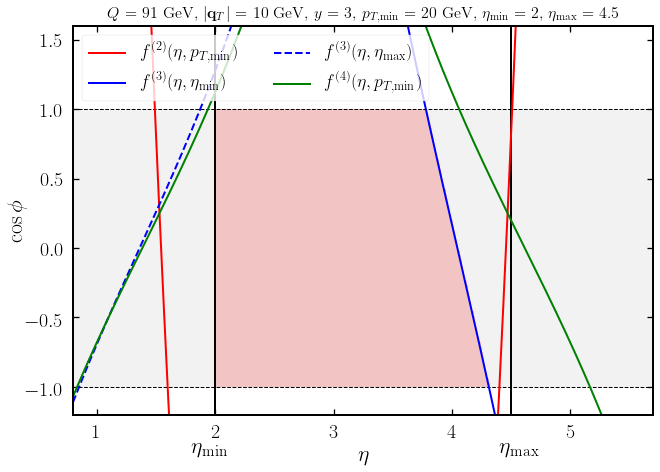

In [9]:
## Define plot parameters
pl.style.use('seaborn-talk')
pl.rc('axes', linewidth=2)
ax = pl.gca()

# Axis labels
pl.xlabel(r'$\eta$', fontsize=22)
pl.ylabel(r'$\cos\phi$', fontsize=22, labelpad=-2)

# Title
pl.title(r"$Q$ = " + str(Q) + " GeV, $|\mathbf{q}_T|$ = " + str(qT) + " GeV, $y$ = " + str(y)
        + r", $p_{T,\rm min}=$ " + str(pTmin) + r" GeV, $\eta_{\rm min}=$ $" + str(etamin)
        + r"$, $\eta_{\rm max}=$ " + str(etamax),
         fontsize = 16)

pl.xticks(size=20)
pl.yticks(size=20)

# Adjust canvas
pl.xlim(-1.2 + etamin, 1.2 + etamax)
pl.ylim(-1.2, 1.6)

# Labels on plot
ax.text(etamin-0.2, -1.5,  r'$\eta_{\rm min}$', fontsize=22)
ax.text(etamax-0.1, -1.5,  r'$\eta_{\rm max}$', fontsize=22)

# Points in eta and x = cos\phi
n = 500
alleta = np.linspace(- 1.2 + etamin, 1.2 + etamax, num = n)
allx   = np.linspace(-1, 1, num = n)
E, X = np.meshgrid(alleta, allx)
T = GenTheta(E, X)

# Countour plot
pl.contourf(E, X, T, levels = [0.0001, 1.], colors = ["red", "blue"], alpha = 0.2)

# Shaded region            
verts = [(-10*etamax, -1)] + [(10*etamax, -1)] + [(10*etamax, 1)] + [(-10*etamax, 1)] 
poly = Polygon(verts, color = "gray", alpha = 0.1)
ax.add_patch(poly)

# Dashed lines
pl.axhline(y=-1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')
pl.axhline(y=1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')

# Theta 1
pl.axvline(x=etamin, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-')
pl.axvline(x=etamax, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-')

# Theta 2
pl.plot(alleta, f2(alleta, pTmin), 'r', linewidth=2, label=r"$f^{(2)}(\eta,p_{T,\rm min})$")

# Theta 3
pl.plot(alleta, f3(alleta, etamin), 'b', linewidth=2, label=r"$f^{(3)}(\eta,\eta_{\rm min})$")
pl.plot(alleta, f3(alleta, etamax), 'b', linewidth=2, label=r"$f^{(3)}(\eta,\eta_{\rm max})$", linestyle='--')

# Theta 4
pl.plot(alleta, f4(alleta, pTmin), 'g', linewidth=2, label=r"$f^{(4)}(\eta, p_{T,\rm min})$")

pl.legend(loc = 'upper left', ncol = 2, fontsize = 18)
pl.savefig("../plots/IntDomainAsy.pdf")